![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# Mobile Phone Detection in an Image

## Domain
Mobile Phones, Computer Vision

## Business Context
The ability to process visual information using machine learning algorithms can be very useful. Electronics companies can use it to identify the presence of a mobile in an image (location), mobile brand just by looking at the image, and minor damages if there are any. The computer vision field has multiple applications and based on the available data it can be used to meet business objectives.
Here, we will use a simple convolutional neural network to classify images with and without mobile phones. 
 
## Objective

Given the images and label whether an image has a mobile phone or not, can you train a model that allows you to map and find the presence of mobile phones within the selected images.


### Package version
- tensorflow==2.3.0
- matplotlib==3.2.1
- h5py==2.10.0
- google==2.0.3

## Table of Content

1. Import Libraries

2. Setting options

3. Data loading and Data Analysis 

4. Visualize and Standardize the data

5. Model Building

6. Evaluate Model

7. Conclusion and Interpretation

## 1. Import Libraries

Let us start by mounting the drive

In [205]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let us check for the version of installed tensorflow.

In [206]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)


from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import SGD
from keras.constraints import maxnorm
from PIL import Image
from PIL import ImageMath

2.5.0


## 2. Setting Options

In [207]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Data loading and Data Analysis 

### Read images and save the pixel information to an array. Also, save their corresponding label to a list ( YES-Mobile - 1, NO-Mobile - 0). Resize the images to shape (128, 128, 3).

In [208]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/mobile-images/')

In [209]:
os.getcwd()

'/content/drive/MyDrive/Colab Notebooks/mobile-images'

In [210]:
import cv2

img = cv2.imread('yes-mobile/img128.png')

In [211]:
img.shape

(90, 90, 3)

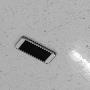

In [212]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [213]:
yes_list= os.listdir('/content/drive/MyDrive/Colab Notebooks/mobile-images/yes-mobile')

In [214]:
yes_list

['img122.png',
 'img129.png',
 'img136.png',
 'img125.png',
 'img121.png',
 'img140.png',
 'img135.png',
 'img126.png',
 'img128.png',
 'img137.png',
 'img142.png',
 'img134.png',
 'img124.png',
 'img123.png',
 'img130.png',
 'img138.png',
 'img132.png',
 'img139.png',
 'img131.png',
 'img133.png',
 'img127.png',
 'img141.png',
 'img162.png',
 'img174.png',
 'img152.png',
 'img164.png',
 'img200.png',
 'img176.png',
 'img210.png',
 'img158.png',
 'img157.png',
 'img159.png',
 'img207.png',
 'img144.png',
 'img188.png',
 'img201.png',
 'img187.png',
 'img155.png',
 'img170.png',
 'img216.png',
 'img219.png',
 'img196.png',
 'img199.png',
 'img217.png',
 'img186.png',
 'img212.png',
 'img202.png',
 'img213.png',
 'img169.png',
 'img184.png',
 'img156.png',
 'img191.png',
 'img161.png',
 'img171.png',
 'img148.png',
 'img203.png',
 'img167.png',
 'img166.png',
 'img208.png',
 'img168.png',
 'img147.png',
 'img190.png',
 'img143.png',
 'img163.png',
 'img220.png',
 'img185.png',
 'img181.p

In [215]:
no_list= os.listdir('/content/drive/MyDrive/Colab Notebooks/mobile-images/no-mobile')

In [216]:
no_list

['img2.png',
 'img118.png',
 'img3.png',
 'img102.png',
 'img108.png',
 'img40.png',
 'img112.png',
 'img33.png',
 'img26.png',
 'img13.png',
 'img44.png',
 'img27.png',
 'img120.png',
 'img110.png',
 'img113.png',
 'img17.png',
 'img107.png',
 'img100.png',
 'img111.png',
 'img42.png',
 'img114.png',
 'img116.png',
 'img49.png',
 'img15.png',
 'img106.png',
 'img24.png',
 'img37.png',
 'img48.png',
 'img28.png',
 'img119.png',
 'img5.png',
 'img101.png',
 'img4.png',
 'img43.png',
 'img14.png',
 'img38.png',
 'img34.png',
 'img30.png',
 'img117.png',
 'img103.png',
 'img1.png',
 'img35.png',
 'img12.png',
 'img16.png',
 'img22.png',
 'img19.png',
 'img115.png',
 'img25.png',
 'img29.png',
 'img105.png',
 'img109.png',
 'img0.png',
 'img45.png',
 'img41.png',
 'img31.png',
 'img20.png',
 'img11.png',
 'img39.png',
 'img23.png',
 'img10.png',
 'img36.png',
 'img21.png',
 'img47.png',
 'img46.png',
 'img104.png',
 'img32.png',
 'img18.png',
 'img87.png',
 'img63.png',
 'img81.png',
 'img

In [217]:
yes_images =[]
yes_labels = []

path_yes = '/content/drive/MyDrive/Colab Notebooks/mobile-images/yes-mobile'
for i in yes_list:
   img_path = os.path.join(path_yes,i)
   img = cv2.imread(img_path)
   img = cv2.resize(img,(128,128))
   yes_images.append(img)
   yes_labels.append(1)

In [218]:
no_images =[]
no_labels = []

path_no = '/content/drive/MyDrive/Colab Notebooks/mobile-images/no-mobile'
for i in no_list:
   img_path_2 = os.path.join(path_no,i)
   img_2 = cv2.imread(img_path_2)
   img_2 = cv2.resize(img_2,(128,128))
   no_images.append(img_2)
   no_labels.append(0)

### Check shape and size of the images

In [219]:
print('{} - total yes_image size'.format(len(yes_images)))
print('{} - total yes_labels size'.format(len(yes_labels)))
print('{} - Reshaped yes_image'.format(yes_images[0].shape))
print('{} - Sample of yes_labels'.format(yes_labels[0]))

124 - total yes_image size
124 - total yes_labels size
(128, 128, 3) - Reshaped yes_image
1 - Sample of yes_labels


In [220]:
print('{} - total no_image size'.format(len(no_images)))
print('{} - total no_labels size'.format(len(no_labels)))
print('{} - Reshaped no_image'.format(no_images[0].shape))
print('{} - Sample of no_labels'.format(no_labels[0]))

121 - total no_image size
121 - total no_labels size
(128, 128, 3) - Reshaped no_image
0 - Sample of no_labels


###  What is the percentage of images with and without mobile phone in the data

In [221]:
print(' The percentage of images with mobile phone in the data - {}%'.format(round(len(yes_images)/(len(yes_images)+len(no_images))*100)))
print(' The percentage of images without mobile phone in the data - {}%'.format(round(len(no_images)/(len(yes_images)+len(no_images))*100)))

 The percentage of images with mobile phone in the data - 51%
 The percentage of images without mobile phone in the data - 49%


### Concatenate above two arrays (array having image details of with and without mobile) into one variable and check the final size of the data
### Concatenate lists having label data into one list

In [222]:
import numpy as np
x_img = np.concatenate((yes_images,no_images),axis=0)
y_labels = np.concatenate((yes_labels,no_labels),axis=0)

In [223]:
print('Type of x_img - {} '.format(type(x_img)))
print('Type of y_labels - {} '.format(type(y_labels)))
print('Shape of x_img - {} '.format(x_img.shape))
print('Shape of y_labels - {} '.format(y_labels.shape))

Type of x_img - <class 'numpy.ndarray'> 
Type of y_labels - <class 'numpy.ndarray'> 
Shape of x_img - (245, 128, 128, 3) 
Shape of y_labels - (245,) 


In [224]:
y_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

### Shuffle the above data and labels ( Data and label should be in sync)

In [225]:
from sklearn.utils import shuffle
data,labels = shuffle(x_img,y_labels,random_state=95)

## 4. Visualize and Standardize the data

### Visualise the first 10 images in the data and print their corresponding labels.

label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 1
label for each of the below image: 0
label for each of the below image: 0


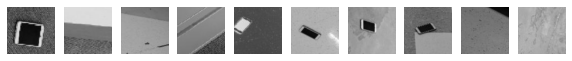

In [226]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(data[i], cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (labels[i]))
plt.show()

### Split the data into train and test

In [227]:
from sklearn.model_selection import train_test_split

In [228]:
x_train,x_test,y_train,y_test = train_test_split(data,labels,random_state=20)

### Print shape of the X train and X test data

In [229]:
print('Shape of X train is {}'.format(x_train.shape))
print('Shape of X test is {}'.format(x_test.shape))

Shape of X train is (183, 128, 128, 3)
Shape of X test is (62, 128, 128, 3)


### Normalize the data by dividing by 255

In [230]:
x_train =x_train/255.0
x_test =x_test/255.0

In [231]:
x_train[0]

array([[[0.51764706, 0.51764706, 0.51764706],
        [0.51764706, 0.51764706, 0.51764706],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        ...,
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5372549 , 0.5372549 , 0.5372549 ]],

       [[0.51764706, 0.51764706, 0.51764706],
        [0.52156863, 0.52156863, 0.52156863],
        [0.5254902 , 0.5254902 , 0.5254902 ],
        ...,
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5372549 , 0.5372549 , 0.5372549 ]],

       [[0.51764706, 0.51764706, 0.51764706],
        [0.52156863, 0.52156863, 0.52156863],
        [0.52941176, 0.52941176, 0.52941176],
        ...,
        [0.53333333, 0.53333333, 0.53333333],
        [0.5372549 , 0.5372549 , 0.5372549 ],
        [0.5372549 , 0.5372549 , 0.5372549 ]],

       ...,

       [[0.54509804, 0.54509804, 0.54509804],
        [0.56862745, 0.56862745, 0.56862745],
        [0.58431373, 0

###  One hot encode the labels for train and test data 
Hint:- We need to one hot encode the labels for the model to understand the labels better. We will be using categorical cross entropy as our loss function and for this purpose we need our labels to be in one hot encoded format.

In [232]:
y_test

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0])

In [233]:
from tensorflow.keras.utils import to_categorical

In [234]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [235]:
y_test_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.

## 5. Model building

### Define the model architecture using TensorFlow with a Conv2D layer followed by dense layers with activation as ReLu and softmax respectively. 

In [236]:
from tensorflow.keras.layers import Conv2D,MaxPool2D
import tensorflow as tf

tf.keras.backend.clear_session()
model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [237]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 57600)             0         
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 64)                3686464   
_________________________________________________________________
module_wrapper_2 (ModuleWrap (None, 32)                2

### Compile the above model using appropriate loss metric. Try with sgd, adam optimizer and "accuracy" as metrics. 

In [238]:
# Compile the model
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="sgd")

### Fit the model on the training dataset along with it's equivalent one hot encoded labels

In [239]:
# Fit the model
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
history = model.fit( x=x_train, y=y_train_cat, batch_size=32, epochs=50, validation_split=0.3,callbacks=callback)

Epoch 1/50
4/4 [==============================] - 1s 73ms/step - loss: 0.6877 - accuracy: 0.5312 - val_loss: 0.7066 - val_accuracy: 0.4727
Epoch 2/50
4/4 [==============================] - 0s 31ms/step - loss: 0.6755 - accuracy: 0.5469 - val_loss: 0.6759 - val_accuracy: 0.7091
Epoch 3/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6890 - accuracy: 0.5078 - val_loss: 0.6873 - val_accuracy: 0.4364
Epoch 4/50
4/4 [==============================] - 0s 31ms/step - loss: 0.6782 - accuracy: 0.5391 - val_loss: 0.7257 - val_accuracy: 0.4727
Epoch 5/50
4/4 [==============================] - 0s 28ms/step - loss: 0.6829 - accuracy: 0.5469 - val_loss: 0.6861 - val_accuracy: 0.4545
Epoch 6/50
4/4 [==============================] - 0s 26ms/step - loss: 0.6541 - accuracy: 0.6641 - val_loss: 0.7114 - val_accuracy: 0.4727
Epoch 7/50
4/4 [==============================] - 0s 25ms/step - loss: 0.7069 - accuracy: 0.4688 - val_loss: 0.6665 - val_accuracy: 0.4545
Epoch 8/50
4/4 [===========

## 6. Evaluate the model


### Evaluate the model on test data and print loss and accuracy

In [240]:
#Testing the model on test set
score = model.evaluate(x_test, y_test_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.4680 - accuracy: 0.8387
Test loss: 0.46803686022758484
Test accuracy: 0.8387096524238586


In [241]:
#Testing the model on test set
score = model.evaluate(x_train, y_train_cat)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

6/6 [==============================] - 0s 7ms/step - loss: 0.3746 - accuracy: 0.8907
Test loss: 0.3745674192905426
Test accuracy: 0.8907103538513184


### Predict label data of the test data and check confusion matrix

In [242]:
y_test_pred = np.argmax(model.predict(x_test),axis=1)

In [243]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_test_pred)

array([[30,  4],
       [ 6, 22]])

### Display test images and their predicted label for a few samples

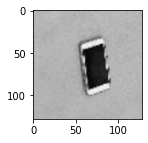

1
predicted image has a mobile


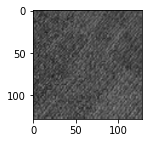

0
predicted image has no mobile


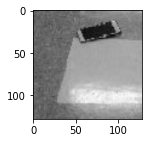

0
predicted image has a mobile


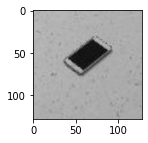

1
predicted image has a mobile


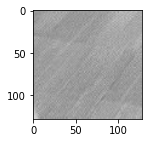

0
predicted image has no mobile


In [244]:
plt.figure(figsize=(2,2))
plt.imshow(x_test[0],cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[0].reshape(1,128,128,3))))
if(y_test[0] == 0):
  print('predicted image has no mobile')
else:
  print('predicted image has a mobile')




plt.figure(figsize=(2,2))
plt.imshow(x_test[3],cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[3].reshape(1,128,128,3))))
if(y_test[3] == 0):
  print('predicted image has no mobile')
else:
  print('predicted image has a mobile')




plt.figure(figsize=(2,2))
plt.imshow(x_test[33],cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[33].reshape(1,128,128,3))))
if(y_test[33] == 0):
  print('predicted image has no mobile')
else:
  print('predicted image has a mobile')


plt.figure(figsize=(2,2))
plt.imshow(x_test[59],cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[59].reshape(1,128,128,3))))
if(y_test[59] == 0):
  print('predicted image has no mobile')
else:
  print('predicted image has a mobile')


plt.figure(figsize=(2,2))
plt.imshow(x_test[37],cmap="gray")
plt.show()
print(np.argmax(model.predict(x_test[37].reshape(1,128,128,3))))
if(y_test[37] == 0):
  print('predicted image has no mobile')
else:
  print('predicted image has a mobile')

### Print following plots
1. Plot training accuracy vs validation accuracy
2. Plot training loss vs validation loss

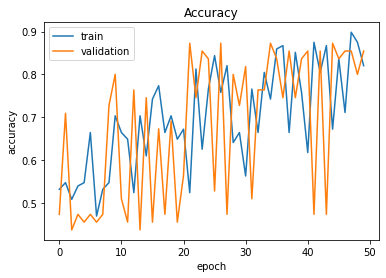

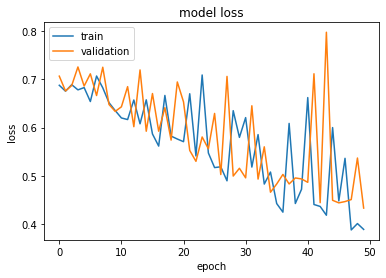

In [245]:
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

## 7.  Conclusion and Interpretation

### Write your observations and findings

**Observations:**

  1 - On using the SGD optimizer the train accuracy is about 89% and test accuracy is about 83%.
  
  2 - From the confusion Matrix we can interpret that among the test set of 62,
      
      Total=62  Predicted 0 predicted 1   Total
      Actual 0    30           4           34
      Actual 1    6           22           28
  
    - out of 28 actual as mobile image, the model correctly predicted the 22 images are mobiles.
    - out of 34 actual as Not a mobile image, the model correctly predicted 30 are not a mobile.

    - Accuracy of prediction as mobile is 23/28 = 83%
    - Accuracy of prediction as not a mobile is 28/34 =83%

3 - Since the Dataset has less size the accuracy looks to be high.

4 -  From the Plot above Validation loss Vs training loss we can witness there is an exploding Gradient issue with the model.

## 8. Further Explore

### Try changing a few hyperparameters such as number of layers in the network or number of units in a hidden layer or try different activation functions in the hidden layers and see if you get better results than the previous network

In [250]:
tf.keras.backend.clear_session()
model_2 = tf.keras.Sequential()
model_2.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(128, 128, 3)))
model_2.add(MaxPool2D(2,2))
model_2.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model_2.add(MaxPool2D(2,2))
model_2.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model_2.add(MaxPool2D(2,2))
model_2.add(Flatten())
model_2.add(Dense(64, activation="relu"))
model_2.add(Dense(32, activation="relu"))
model_2.add(Dense(16, activation="relu"))
model_2.add(Dense(2, activation="softmax"))

In [251]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 25088)             0

In [252]:
# Compile the model

model_2.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [253]:
# Fit the model
callback_2 = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience = 10,restore_best_weights=True,mode = 'min')
history_2 = model_2.fit( x=x_train, y=y_train_cat, batch_size=32, epochs=10, validation_split=0.3,callbacks=callback_2)

Epoch 1/10
4/4 [==============================] - 1s 85ms/step - loss: 0.7006 - accuracy: 0.5312 - val_loss: 0.7649 - val_accuracy: 0.4727
Epoch 2/10
4/4 [==============================] - 0s 34ms/step - loss: 0.7059 - accuracy: 0.5469 - val_loss: 0.6969 - val_accuracy: 0.4727
Epoch 3/10
4/4 [==============================] - 0s 31ms/step - loss: 0.6779 - accuracy: 0.5469 - val_loss: 0.6840 - val_accuracy: 0.4727
Epoch 4/10
4/4 [==============================] - 0s 32ms/step - loss: 0.6524 - accuracy: 0.5469 - val_loss: 0.6468 - val_accuracy: 0.4727
Epoch 5/10
4/4 [==============================] - 0s 29ms/step - loss: 0.5660 - accuracy: 0.5547 - val_loss: 0.5756 - val_accuracy: 0.7273
Epoch 6/10
4/4 [==============================] - 0s 29ms/step - loss: 0.4453 - accuracy: 0.8750 - val_loss: 0.4255 - val_accuracy: 0.8545
Epoch 7/10
4/4 [==============================] - 0s 29ms/step - loss: 0.3069 - accuracy: 0.9062 - val_loss: 0.3880 - val_accuracy: 0.8909
Epoch 8/10
4/4 [===========

In [256]:
#Testing the model on test set
score_2 = model_2.evaluate(x_test, y_test_cat)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

2/2 [==============================] - 0s 9ms/step - loss: 0.8609 - accuracy: 0.8226
Test loss: 0.8609347939491272
Test accuracy: 0.8225806355476379


In [257]:
y_test_pred_2 = np.argmax(model_2.predict(x_test),axis=1)
confusion_matrix(y_test,y_test_pred_2)

array([[32,  2],
       [ 9, 19]])

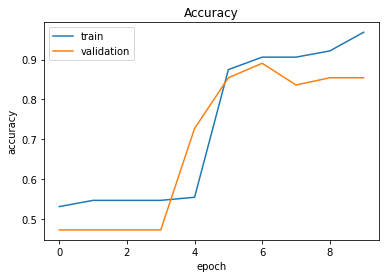

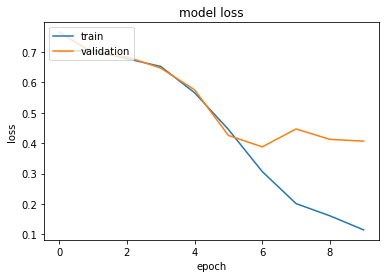

In [258]:
plt.plot(history_2.history['accuracy'])  
plt.plot(history_2.history['val_accuracy'])  
plt.title('Accuracy')  
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()


plt.plot(history_2.history['loss'])  
plt.plot(history_2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

**Observations:**

  1 - On using the Adam optimizer the train accuracy is about 99% and test accuracy is about 82%.
  
  2 - From the confusion Matrix we can interpret that among the test set of 62,
      
      Total=62  Predicted 0 predicted 1   Total
      Actual 0    32           2           34
      Actual 1    9            19          28
  
    - out of 28 actual as mobile image, the model correctly predicted the 19 images are mobiles.
    - out of 34 actual as Not a mobile image, the model correctly predicted 32 are not a mobile.

3 - Since the Dataset has less size the accuracy looks to be high.

4-  From the Plot above Validation loss Vs training loss we can witness that the use of optimizer as adam has reduced the exploding gradient issues where the loss of validation and training set is of smooth curve.